# PSP Automated Magnetic Hole Finder
## By: Robert Alexander + Jaye Verniero


### 0.1) Import Packages, Define Helper Functions, and Set Save Directory

In [1]:
# Cell 1: Imports and Initial Configuration

# --- Plotbot Core Imports ---
try:
    from plotbot import print_manager as pm
    # Configure Print Manager Verbosity (adjust as needed for debugging)
    pm.show_error = True
    pm.show_warnings = True
    pm.show_status = True     # Good for seeing high-level progress
    pm.show_debug = False     # Set to True for very detailed internal Plotbot logs
    pm.show_datacubby = False # Set to True to debug DataCubby interactions
    pm.show_processing = False# Set to True for Plotbot data processing steps
    print("✅ Successfully imported and configured Plotbot's print_manager.")
except ImportError:
    print("⚠️ Could not import Plotbot's print_manager. Some log messages may be missing.")
    pm = None

# Import for direct data loading/populating DataCubby & the specific global instances
from plotbot import get_data as plotbot_get_data 
from plotbot import mag_rtn  # For MAG_RTN data (1 sample/cycle)
# from plotbot import mag_rtn_4sa # If you also need 4sa MAG data in snapshots
# from plotbot import proton      # Example: if you want proton data
# from plotbot import epad        # Example: if you want electron PAD data

# Import for snapshotting
from plotbot.data_snapshot import save_data_snapshot, load_data_snapshot

# --- Local Application Imports ---
# For running your analysis algorithm
from magnetic_hole_finder.magnetic_hole_finder_core import HoleFinderSettings, detect_magnetic_holes_and_generate_outputs

# --- Standard Library Imports ---
import os
import json # For settings files, though core function handles its own now
from datetime import datetime
from collections import Counter # For handling the returned counter from analysis

# --- Third-Party Data Science Libraries (primarily for ad-hoc notebook use if needed) ---
import numpy as np 
import pandas as pd
# import matplotlib.pyplot as plt # If doing custom plots in the notebook

# --- Warnings Handling ---
from warnings import simplefilter
import warnings
simplefilter(action='ignore', category=DeprecationWarning) # Ignore general deprecation warnings
warnings.filterwarnings("ignore", message="invalid value encountered in divide") # Example specific warning
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide") # Example
warnings.filterwarnings("ignore", category=DeprecationWarning, module="IPython.core.pylabtools") # For IPython

# --- Final Import Confirmation ---
current_time_consolidated = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f'{current_time_consolidated} - 📚 All libraries imported and environment configured.')

initialized server_access
initialized global_tracker
initialized ploptions
initialized plot_manager
*** MAG_CLASS_INIT (mag_rtn_4sa_class) ID:6099647184: imported_data ID: None. ***
initialized mag_rtn_4sa class
initialized mag_rtn class
initialized mag_sc_4sa class
initialized mag_sc class
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized data_cubby
initialized proton_fits class
initialized ham_class
🔉 initialized audifier

Importing libraries, this may take a moment. Hold tight... 

✅ Imported standard libraries and utilities.
✅ Imported numpy, pandas, and scipy libraries.
✅ Imported matplotlib libraries.
✅ Imported cdflib, BeautifulSoup, requests, dateutil, and datetime libraries.

🤖 Plotbot Initialized
✨ Showdahodo initialized
Positional Data Helper Initialized
📈📉 Multiplot Initialized
   Version: 2025_05_07_v2.27
Commit: Docs: Log snapshot notes & tag Parker Four presentation version (v2.27)

🤖 Plotbot Initialized
✅ S

### Load The Snapshot!

In [2]:
# load_data_snapshot('Magnetic_Hole_Multi_Encounter_Snapshot.pkl') 

🚀 Initiating multi-panel showda_holes for 4 panels.
--- Processing Panel 1/4 ---
Panel: Plotting mag_rtn_4sa.bmag vs epad.centroids
Parsed 106 hole intervals from /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt
Panel: Calling get_data for needed variables.
📡 spe_sf0_pad - A local .cdf file already exists:
📂 psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20230928_v04.cdf
*** IDF_DEBUG: Entered Standard CDF Processing for spe_sf0_pad ***
*** IDF_DEBUG: About to compute start_tt2000 for start_time: 2023-09-28 06:32:00+00:00 ***
*** IDF_DEBUG: Computed start_tt2000: 749154789184000000. About to compute end_tt2000 for end_time: 2023-09-28 06:45:00+00:00 ***
*** IDF_DEBUG: Computed end_tt2000: 749155569184000000 ***
☑️ - CDF Data import complete for spe_sf0_pad range ['2023-09-28 06:32:00', '2023-09-28 06:45:00'].

    data_object ID: 6386936960
 

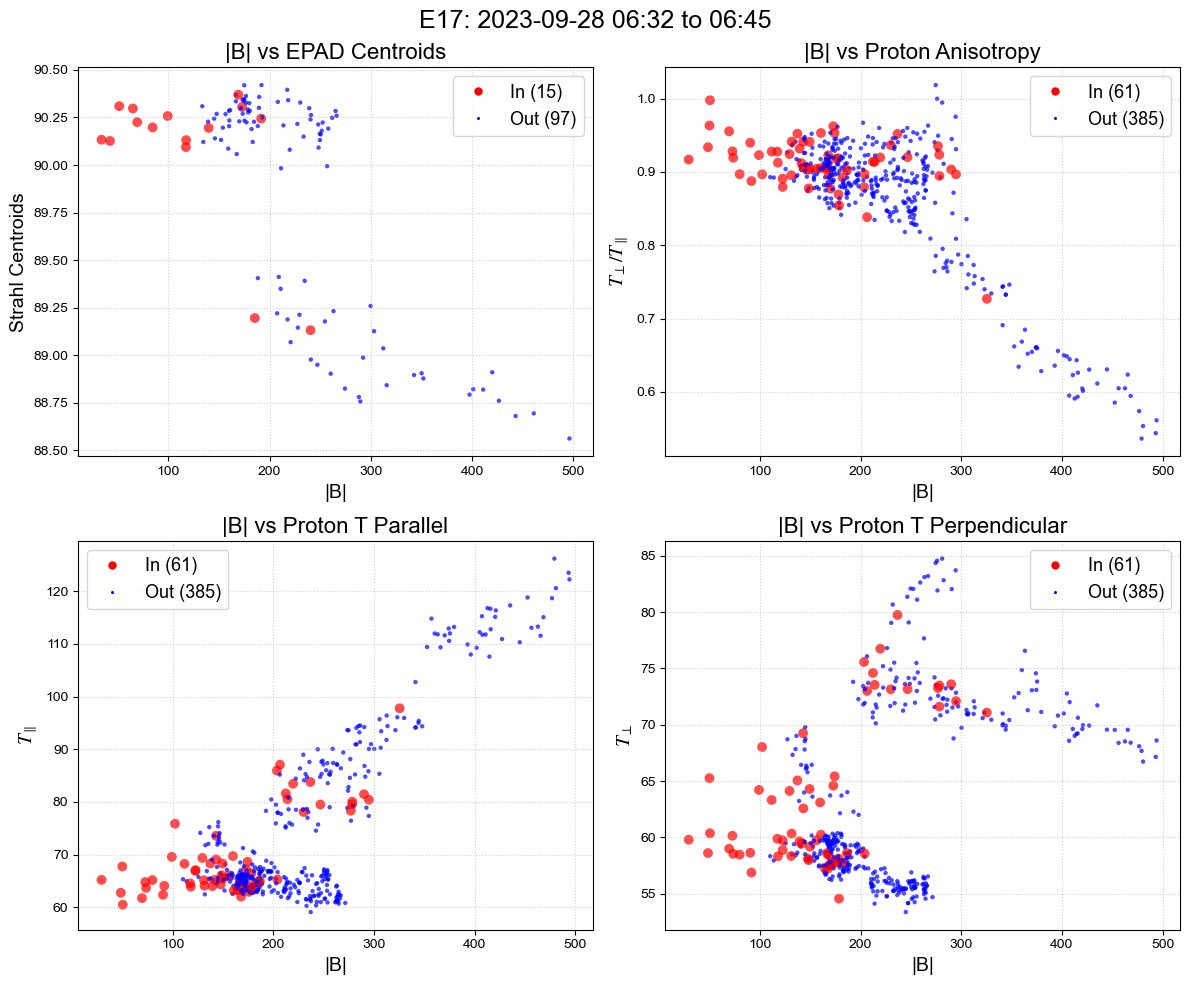

✅ Multi-panel hodogram displayed.
Multi-panel plot generated. axes shape: (2, 2)


In [3]:
# --- Common Setup ---
# Ensure necessary data modules are imported
from plotbot import epad, mag_rtn_4sa, proton, showda_holes
from plotbot import print_manager as pm # Assuming you might use pm later

trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E15_2_tight = ['2023-03-17 21:05:00', '2023-03-17 21:15:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 06:00:00', '2023-09-28 07:30:00']

# trange = trange_E15_2_tight
# Or any other trange you want to test
# --- Select active time range ---
# trange = trange_E9
# trange = trange_E10
# trange = trange_E11
# trange = trange_E15_1
# trange = trange_E15_2
# trange = trange_E17
trange = trange_E17


mh_marker_file_path = "/Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt"
# mh_marker_file_path = "/Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_203000_to_214500_Bmag_Holes/PSP_MH_Marker_Set_E15_2023-03-17_203000_to_214500_V3_MAX_AND_MIN.txt"


# Optional: Turn on debug prints if needed
# pm.show_debug = True

# --- Define the panel definitions (REQUIRED for multi-panel mode) ---
# *** Panel Order Updated ***
panel_defs = [
    # --- Panel 1: Upper Left (|B| vs EPAD Centroids) --- <<< MOVED HERE
    {'x_data': mag_rtn_4sa.bmag, 'y_data': epad.centroids, 'marker_file': mh_marker_file_path, 'title': '|B| vs EPAD Centroids'}, 
    # --- Panel 2: Upper Right (|B| vs Anisotropy) --- <<< Was Panel 1
    {'x_data': mag_rtn_4sa.bmag, 'y_data': proton.anisotropy, 'marker_file': mh_marker_file_path, 'title': '|B| vs Proton Anisotropy'}, 
    # --- Panel 3: Lower Left (|B| vs Proton T Parallel) ---
    {'x_data': mag_rtn_4sa.bmag, 'y_data': proton.t_par, 'marker_file': mh_marker_file_path, 'title': '|B| vs Proton T Parallel'},
    # --- Panel 4: Lower Right (|B| vs Proton T Perpendicular) ---
    {'x_data': mag_rtn_4sa.bmag, 'y_data': proton.t_perp, 'marker_file': mh_marker_file_path, 'title': '|B| vs Proton T Perpendicular'} 
]



proton.energy_flux
proton.phi_flux

# --- Call showda_holes using panel_definitions ---
fig, axes = showda_holes(
    # --- Required Arguments for Multi-Panel ---
    trange,                   # Your time range list
    panel_definitions=panel_defs, # The list of panel definitions from above

    # --- Optional Global Keyword Arguments (Defaults shown) ---
    # main_title=None,             # Default: Auto-generates "Encounter: Start to End". Provide string to override.
    main_title_fontsize=18,    # Default: base_fontsize + 4. Provide integer to override.
    main_title_y=0.98,           # Default: 0.98 (near top). Use e.g., 0.95 to move down.
    # --- Other KWARGS passed to _plot_single_hodogram_panel as defaults ---
    # figsize=(14, 10),            # Default adjusts based on panel number. Example: (14, 10)
    base_fontsize=14             # Default: 12. Example: 10
    # x_label=None,                # Default X label if not set in panel_def (tries data object)
    # y_label=None,                # Default Y label if not set in panel_def (tries data object)
    # inside_color='red',          # Default color for points inside holes
    # outside_color='blue',        # Default color for points outside holes
    # inside_size=50,              # Default marker size for points inside holes
    # outside_size=10,             # Default marker size for points outside holes
    # alpha=0.7,                   # Default marker transparency (0.0 to 1.0)
)

# --- Check and Use Result ---
if fig and axes is not None:
    print(f"Multi-panel plot generated. axes shape: {axes.shape}")
    # You can access individual axes, e.g., axes[0, 1] for the top-right panel
else:
    print("Multi-panel showda_holes failed.")

In [4]:
import os # Ensure os is imported

# Define the main directory where all outputs will go
# This is what the user might change.
BASE_SAVE_DIRECTORY = os.path.abspath("MH_Scan_Output") # Path relative to project root
os.makedirs(BASE_SAVE_DIRECTORY, exist_ok=True) # Create it if it doesn't exist
print(f'🛟 Algorithm output base directory set to: {BASE_SAVE_DIRECTORY}')

🛟 Algorithm output base directory set to: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output


In [5]:
# Cell 3: Configure HoleFinderSettings for the Run

# Instantiate settings with defaults from the class
mh_run_settings = HoleFinderSettings()

# === Customize parameters for THIS SPECIFIC RUN ===
# Values shown here are examples if you want to override the defaults 
# defined in the HoleFinderSettings class. If the default is fine, you don't need to set it here.

# --- Core Algorithm Parameters ---
mh_run_settings.INSTRUMENT_SAMPLING_RATE = 292.9 
mh_run_settings.use_calculated_sampling_rate = True
mh_run_settings.depth_percentage_threshold = 0.25
mh_run_settings.smoothing_window_seconds = 8.0
mh_run_settings.derivative_window_seconds = 0.2
mh_run_settings.min_max_finding_smooth_window = 0.3
mh_run_settings.mean_threshold = 0.8
mh_run_settings.search_in_progress_output = True  # For verbose logging during detection
mh_run_settings.additional_seconds_for_min_search = 0.2
mh_run_settings.asymetric_peak_threshold = 0.25
mh_run_settings.symmetrical_peak_scan_window_in_secs = 2.0
mh_run_settings.Bave_scan_seconds = 0.1
mh_run_settings.Bave_window_seconds = 20.0
mh_run_settings.wide_angle_threshold = 15.0
mh_run_settings.small_threshold_cross_flag_samples = 10
mh_run_settings.small_threshold_cross_adjustment_samples = 10

# --- Algorithm Breaking Condition Flags ---
mh_run_settings.break_for_shallow_hole = True
mh_run_settings.break_for_assymettry = False 
mh_run_settings.break_for_wide_angle = False 
mh_run_settings.break_for_small_threshold_cross = False
mh_run_settings.break_for_complex_hole = False 
mh_run_settings.threshold_for_derivative_0_crossings_flag = 1000
mh_run_settings.break_for_derivative_crossings = False

# --- Output Generation Control Flags (for outputs handled by the core .py function) ---
mh_run_settings.OUTPUT_MAIN_PLOT = True 
mh_run_settings.SAVE_MAIN_PLOT = True   
mh_run_settings.PLOT_HOLE_MINIMUM_ON_MAIN_PLOT = True 
mh_run_settings.PLOT_THRESH_CROSS_ON_MAIN_PLOT = True 

mh_run_settings.OUTPUT_ZERO_CROSSING_PLOT = False # For the specific plot in zero_crossing_analysis

mh_run_settings.IZOTOPE_MARKER_FILE_OUTPUT_MAX_AND_MIN = True 
mh_run_settings.IZOTOPE_MARKER_FILE_OUTPUT_GENERAL = False
mh_run_settings.MARKER_FILE_VERSION = 3
mh_run_settings.MARKER_FILES_WITH_ANNOTATED_MARKERS = False
mh_run_settings.MARKER_FILES_WITH_HOLE_NUMBERS = False

mh_run_settings.EXPORT_AUDIO_FILES = True
mh_run_settings.AUDIO_SAMPLING_RATE = 22000

mh_run_settings.download_only = False # Set to True to only download

print("HoleFinderSettings configured for this run. Current settings:")
# Pretty print the settings for verification
# import json
# print(json.dumps(mh_run_settings.__dict__, indent=4))

HoleFinderSettings configured for this run. Current settings:


Starting analysis for trange: ['2023-03-17 21:10:0', '2023-03-17 21:11:00']...
Outputs will be saved within base directory: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output
Starting analysis for trange: ['2023-03-17 21:10:0', '2023-03-17 21:11:00']. Download_only mode: False
Entering setup_output_directory with base_save_dir: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output
Encounter directory path: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15
Creating encounter directory: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15
Final subdirectory path: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
Exiting setup_output_directory, returning: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
✅ Outputs for this run will be saved in: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
Ext

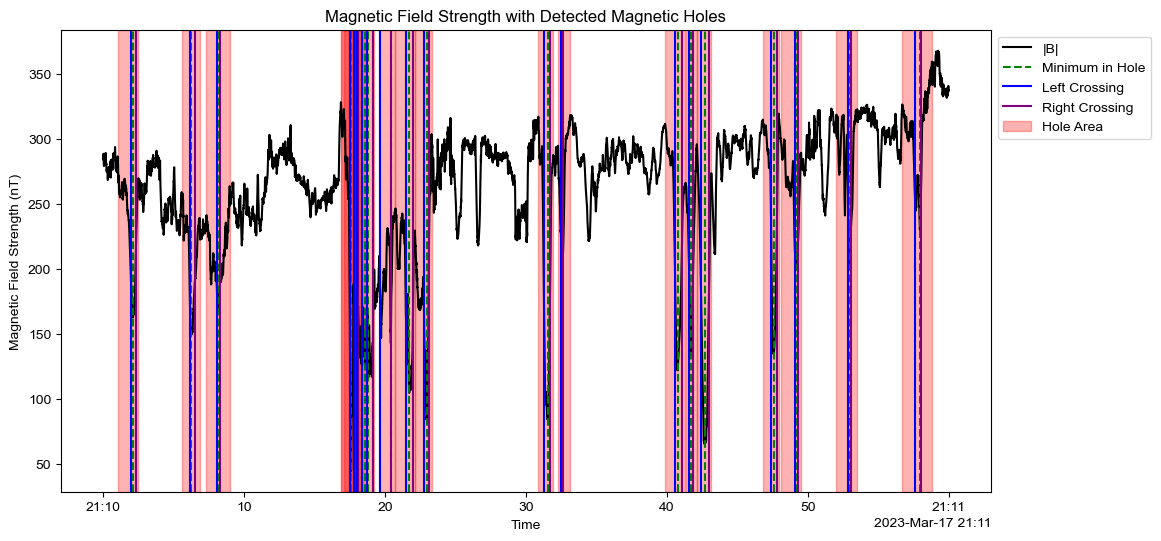

Generating iZotope marker file...
Saving iZotope marker file output
Running setup_output_directory from iZotope_marker_file_output:
Entering setup_output_directory with base_save_dir: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
Encounter directory path: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes/E15
Creating encounter directory: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes/E15
Final subdirectory path: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
Exiting setup_output_directory, returning: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
File path: /U

Button(description='Show Directory', style=ButtonStyle())

Exporting audio files...
Requested time range: ['2023-03-17/21:10:00.000', '2023-03-17/21:11:00.000']
Running setup_output_directory from audify without plot
Fetching MAG data (standard res) for ['2023-03-17/21:10:00.000', '2023-03-17/21:11:00.000'] using Plotbot and global instance.
[MH_DM_DEBUG] >>> Calling plotbot_get_data with trange=['2023-03-17/21:10:00.000', '2023-03-17/21:11:00.000'] and passing the global_plotbot_mag_rtn instance (id=6099819248).
[GET_DATA_ENTRY] Instance mag_RTN (ID: 6099819248) passed in. Len: 22265, Min: 2023-03-17T21:09:52.001811072, Max: 2023-03-17T21:11:07.996703360
Getting data for time range: 2023-03-17/21:10:00.000 to 2023-03-17/21:11:00.000
Initial check for variable: <class 'plotbot.data_classes.psp_mag_classes.mag_rtn_class'>
[GET_DATA PRE-LOOP] required_data_types set: {'mag_RTN'}
🛰️ mag_RTN - acquiring all variables
[GET_DATA IN-LOOP] Current data_type from set: 'mag_RTN' (Type: <class 'str'>)
Processing Data Type: mag_RTN...
[GET_DATA_CONFIG_CHE

Button(description='Show Directory', style=ButtonStyle())

Button(description='Open |B|', style=ButtonStyle())

Button(description='Open Br', style=ButtonStyle())

Button(description='Open Bt', style=ButtonStyle())

Button(description='Open Bn', style=ButtonStyle())

Run settings and summary saved to: /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes/run_settings_and_summary.json
Magnetic hole detection and output generation complete for trange: ['2023-03-17 21:10:0', '2023-03-17 21:11:00']

✅ Analysis complete. 20 holes confirmed.

--- Magnetic Hole Detection Summary (from returned counter) ---
potential: 23
confirmed: 20
asymmetric_initial: 11
complex_holes_flagged: 11
small_threshold_cross: 5
shallow: 3
---------------------------------------------------------------
All outputs (plots, markers, settings JSON) saved in the run-specific subdirectory.


In [13]:
trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E15_2_tight = ['2023-03-17 21:05:00', '2023-03-17 21:15:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 06:00:00', '2023-09-28 07:30:00']



trange_E15_2_tighter = ['2023-03-17 21:10:0', '2023-03-17 21:11:00']
# trange_E15_2_explore = ['2023-03-17 21:10:15', '2023-03-17 21:10:20']

TIME_RANGE_TO_ANALYZE = trange_E15_2_tighter
# Or any other trange you want to test



print(f"Starting analysis for trange: {TIME_RANGE_TO_ANALYZE}...")
print(f"Outputs will be saved within base directory: {BASE_SAVE_DIRECTORY}")

# The main call to the refactored orchestrator function
# It now handles sub_save_dir creation, detection, and all standard outputs internally.
analysis_results = detect_magnetic_holes_and_generate_outputs(
    TIME_RANGE_TO_ANALYZE,
    BASE_SAVE_DIRECTORY, # Pass the top-level save directory
    mh_run_settings      # Pass the configured settings object
)

# The function returns the primary scientific results for optional inspection
if analysis_results:
    magnetic_holes, hole_minima, hole_maxima_pairs, times_clipped, bmag, magnetic_hole_details, returned_hole_counter = analysis_results
    print(f"\n✅ Analysis complete. {returned_hole_counter.get('confirmed', 0)} holes confirmed.")
    # You can still do a quick print of the counter here
    print("\n--- Magnetic Hole Detection Summary (from returned counter) ---")
    for key, value in returned_hole_counter.items():
        print(f"{key}: {value}")
    print("---------------------------------------------------------------")
    print(f"All outputs (plots, markers, settings JSON) saved in the run-specific subdirectory.")
else:
    print("Analysis aborted or returned no results (check logs for errors).")


🚀 Initiating single-panel showda_holes.
Panel: Plotting mag_rtn_4sa.br vs proton.anisotropy
Parsed 106 hole intervals from /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt
Panel: Target resampling interval: 0 days 00:00:01.747620480
Panel: Resampled to 446 common data points.
Panel: 61 points inside holes.
Panel: Successfully plotted mag_rtn_4sa.br vs proton.anisotropy


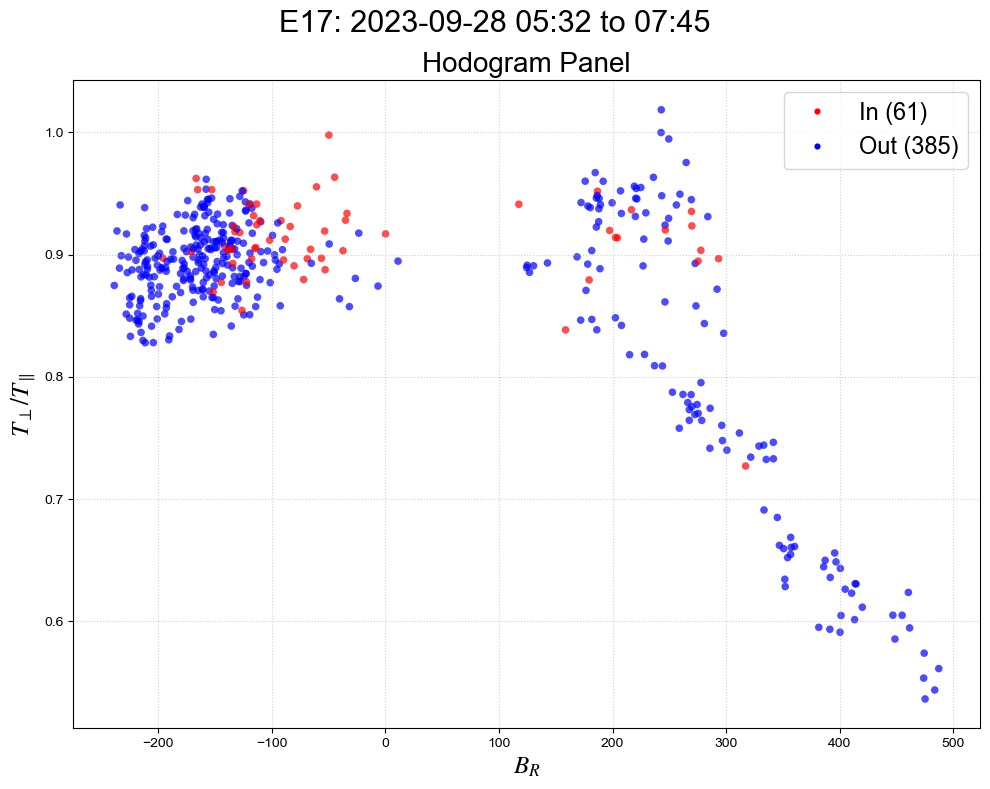

✅ Single hodogram displayed.


In [7]:
from plotbot import showda_holes
from plotbot import mag_rtn_4sa, proton # Or other data modules you need
from plotbot import print_manager as pm

# Define your time range
trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 05:32:00', '2023-09-28 07:45:00']

# trange = trange_E9
# trange = trange_E10
# trange = trange_E11
# trange = trange_E15_1
# trange = trange_E15_2
# trange = trange_E17
trange = trange_E17_w

#proton temp anisotropy, proton pressure, etc

mh_marker_file_path = "/Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt" 

pm.show_debug = False

# Call showdahodo with the time range and two variable objects
fig, ax = showda_holes(
    # --- Required Arguments ---
    trange,                    # Your defined time range list
    mag_rtn_4sa.br,            # Your X-axis data request
    # proton.anisotropy,         # Your Y-axis data request
    # proton.beta_pperp,         # Your Y-axis data request
    proton.anisotropy,         # Your Y-axis data request
    mh_marker_file_path,       # Your marker file path

    # --- Optional Keyword Arguments (Defaults shown) ---
    # title="Hodogram with Magnetic Holes", # Uncomment and change title string if desired
    # x_label=None,                # Leave as None to use data label, or provide string e.g., "Br (nT)"
    # y_label=None,                # Leave as None to use data label, or provide string e.g., "Proton Anisotropy"
    # inside_color='red',        # Color for points inside holes
    # outside_color='blue',      # Color for points outside holes
    inside_size=30,            # Marker size for points inside holes
    outside_size=30,           # Marker size for points outside holes
    # alpha=0.7,                 # Marker transparency (0.0 to 1.0)
    # figsize=(10, 8),           # Figure size (width, height) in inches
    base_fontsize=18           # Base font size for text elements
)


# Example using mag_rtn_4sa data components:
# fig, ax = showdahodo(trange, mag_rtn_4sa.br, mag_rtn_4sa.

📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230928_v02.cdf
*** IDF_DEBUG: Entered Standard CDF Processing for mag_RTN_4sa ***
*** IDF_DEBUG: About to compute start_tt2000 for start_time: 2023-09-28 05:32:00+00:00 ***
*** IDF_DEBUG: Computed start_tt2000: 749151189184000000. About to compute end_tt2000 for end_time: 2023-09-28 07:45:00+00:00 ***
*** IDF_DEBUG: Computed end_tt2000: 749159169184000000 ***
☑️ - CDF Data import complete for mag_RTN_4sa range ['2023-09-28 05:32:00', '2023-09-28 07:45:00'].

    data_object ID: 13003634752
    DataObject.times length: 36529, dtype: int64
    data_object.data ID: 13176109760
    DataObject.data keys: ['psp_fld_l2_mag_RTN_4_Sa_per_Cyc']
        'psp_fld_l2_mag_RTN_4_Sa_per_Cyc' is PRESENT. Type: <class 'numpy.ndarray'>, Shape: (36529, 3), Len: 36529
*** GET_DATA DEBUG: data_obj from import_data_function ID: 13003634752, data_obj.data ID: 13176109760, data_obj.

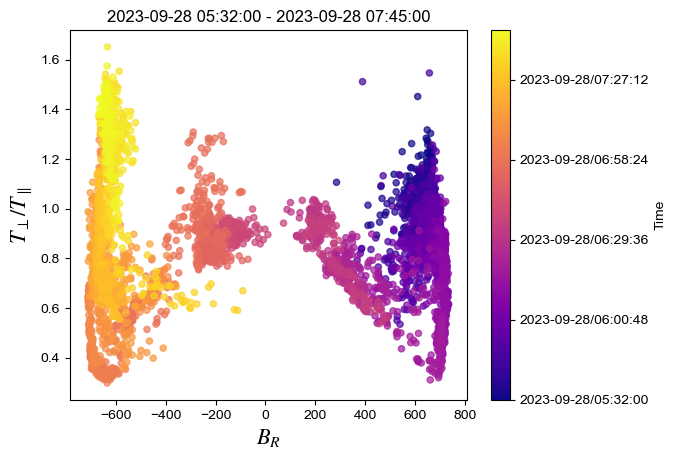

In [8]:
from plotbot import showdahodo
from plotbot import mag_rtn_4sa, proton # Or other data modules you need

# Define your time range
trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 05:32:00', '2023-09-28 07:45:00']

trange = trange_E17_w

#proton temp anisotropy, proton pressure, etc

# Call showdahodo with the time range and two variable objects
fig, ax = showdahodo(trange, mag_rtn_4sa.br, proton.anisotropy )

# Example using mag_rtn_4sa data components:
# fig, ax = showdahodo(trange, mag_rtn_4sa.br, mag_rtn_4sa.

### DATA LENGTH CHECKER

In [9]:
import pickle
import os
import numpy as np # For checking array properties
import pandas as pd # For datetime/timestamp checks

# Make sure Plotbot's custom classes are importable
# This might require sys.path adjustments if your notebook isn't in the root
# import sys
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # Example if notebook is in a subdir

from plotbot.data_classes.psp_mag_classes import mag_rtn_4sa_class # Adjust import as needed
from plotbot.plot_manager import plot_manager # if plot_manager objects are part of the class
from plotbot.ploptions import ploptions # if ploptions objects are part of the class


filepath = "data_snapshots/full_mission_mag_rtn_4sa.pkl"
loaded_data = None

try:
    with open(filepath, 'rb') as f:
        loaded_data = pickle.load(f)
    print(f"Successfully loaded: {filepath}")
except Exception as e:
    print(f"Error loading snapshot: {e}")

if loaded_data:
    print(f"Type of loaded data: {type(loaded_data)}")
    if isinstance(loaded_data, dict):
        print(f"Keys in snapshot: {list(loaded_data.keys())}")
        for key, obj_instance in loaded_data.items():
            print(f"--- Inspecting: {key} (Type: {type(obj_instance)}) ---")
            if hasattr(obj_instance, 'datetime_array') and obj_instance.datetime_array is not None:
                print(f"  datetime_array len: {len(obj_instance.datetime_array)}")
                if len(obj_instance.datetime_array) > 0:
                    print(f"  datetime_array first element type: {type(obj_instance.datetime_array[0])}")
            else:
                print(f"  datetime_array: Not found or None")

            if hasattr(obj_instance, 'time') and obj_instance.time is not None:
                # Check if it's a numpy array to get shape, otherwise len
                if isinstance(obj_instance.time, np.ndarray):
                    print(f"  time (TT2000) shape: {obj_instance.time.shape}, size: {obj_instance.time.size}")
                    if obj_instance.time.size > 0:
                         print(f"  time first element type: {type(obj_instance.time[0]) if obj_instance.time.ndim > 0 else type(obj_instance.time.item())}")

                elif hasattr(obj_instance.time, '__len__'):
                    print(f"  time (TT2000) len: {len(obj_instance.time)}")
                    if len(obj_instance.time) > 0:
                         print(f"  time first element type: {type(obj_instance.time[0])}")
                else: # Scalar or other
                    print(f"  time (TT2000): {obj_instance.time} (Type: {type(obj_instance.time)})")
            else:
                print(f"  time (TT2000): Not found or None")

            if hasattr(obj_instance, 'field') and obj_instance.field is not None:
                 if isinstance(obj_instance.field, np.ndarray):
                    print(f"  field shape: {obj_instance.field.shape}")
                 elif hasattr(obj_instance.field, '__len__'): # e.g. list of arrays
                    print(f"  field (list) len: {len(obj_instance.field)}")
                    if len(obj_instance.field) > 0 and hasattr(obj_instance.field[0], 'shape'):
                        print(f"  field component 0 shape: {obj_instance.field[0].shape}")

            else:
                print(f"  field: Not found or None")

            if hasattr(obj_instance, 'raw_data') and isinstance(obj_instance.raw_data, dict):
                print(f"  raw_data keys: {list(obj_instance.raw_data.keys())}")
                for r_key, r_val in obj_instance.raw_data.items():
                    if isinstance(r_val, np.ndarray):
                        print(f"    raw_data['{r_key}'] shape: {r_val.shape}")
                    elif isinstance(r_val, list) and r_val and hasattr(r_val[0], 'shape'):
                         print(f"    raw_data['{r_key}'] (list) len: {len(r_val)}, component 0 shape: {r_val[0].shape}")
                    elif hasattr(r_val, '__len__'):
                        print(f"    raw_data['{r_key}'] len: {len(r_val)}")

    # You might need to adjust the key if mag_rtn_4sa was saved under a specific one
    # mag_data = loaded_data.get('mag_rtn_4sa') # Or whatever key it was saved under
    # if mag_data:
    #     # Inspect mag_data attributes as above
    #     pass

Successfully loaded: data_snapshots/full_mission_mag_rtn_4sa.pkl
Type of loaded data: <class 'dict'>
Keys in snapshot: ['mag_rtn_4sa']
--- Inspecting: mag_rtn_4sa (Type: <class 'plotbot.data_classes.psp_mag_classes.mag_rtn_4sa_class'>) ---
  datetime_array len: 54578256
  datetime_array first element type: <class 'numpy.datetime64'>
  time (TT2000) shape: (2373042,), size: 2373042
  time first element type: <class 'numpy.int64'>
  field shape: (2373042, 3)
  raw_data keys: ['bt', 'pmag', 'bmag', 'bn', 'br', 'all']
    raw_data['bt'] shape: (54578256,)
    raw_data['pmag'] shape: (54578256,)
    raw_data['bmag'] shape: (54578256,)
    raw_data['bn'] shape: (54578256,)
    raw_data['br'] shape: (54578256,)
    raw_data['all'] (list) len: 3, component 0 shape: (54578256,)


Data Type Check:

In [10]:
import plotbot
from plotbot.data_classes.psp_data_types import data_types as psp_data_types_config
from plotbot import print_manager

# Ensure debug prints are on to see the output from import_data_function
print_manager.show_debug = True
print_manager.show_variable_testing = True # If import_data_function uses this

# Define a short, common time range likely to have data for many types
# (Adjust if needed, ensure corresponding CDFs exist locally for types you want to test)
test_trange = ['2021-04-28 00:00:00', '2021-04-28 01:00:00'] 

# List of data types to test (can be all keys from psp_data_types_config or a subset)
# For now, let's focus on 'mag_RTN' as it was problematic, and maybe a couple of others.
types_to_test = {
    'mag_RTN': plotbot.mag_rtn,
    'mag_RTN_4sa': plotbot.mag_rtn_4sa,
    # Add other types and their corresponding global plotbot instances if you want to test more
    # 'mag_SC': plotbot.mag_sc,
    # 'spe_sf0_pad': plotbot.epad, # Assuming epad is the global instance for spe_sf0_pad
    # 'spi_sf00_l3_mom': plotbot.proton # Assuming proton is the global instance
}

print(f"--- Starting Data Load Test for Multiple Types ---")
for type_key, global_instance in types_to_test.items():
    print(f"--- Testing data_type: {type_key} ---")
    try:
        # We are primarily interested in what import_data_function returns.
        # The call to plotbot.get_data will trigger it.
        # The KeyError would happen inside calculate_variables if the key is missing.
        plotbot.get_data(test_trange, global_instance)
        print(f"  ✅ plotbot.get_data call completed for {type_key}")
        
        # Optional: Check the state of the global instance if needed,
        # but the main goal is to see the *** IMPORT_DATA_DEBUG *** prints
        # print(f"    {type_key}.datetime_array len: {len(global_instance.datetime_array) if global_instance.datetime_array is not None else 'None'}")

    except KeyError as ke:
        print(f"  🔴 KeyError for {type_key}: {ke}")
    except Exception as e:
        print(f"  🔴 Other Error for {type_key}: {e}")
    print(f"--- Finished testing data_type: {type_key} ---\n")

print(f"--- Data Load Test Complete ---")

--- Starting Data Load Test for Multiple Types ---
--- Testing data_type: mag_RTN ---
[GET_DATA_ENTRY] Instance mag_RTN (ID: 6099819248) passed in. Len: 6153, Min: 2023-03-17T21:10:07.000120704, Max: 2023-03-17T21:10:27.998867456
Getting data for time range: 2021-04-28 00:00:00 to 2021-04-28 01:00:00
Initial check for variable: <class 'plotbot.data_classes.psp_mag_classes.mag_rtn_class'>
[GET_DATA PRE-LOOP] required_data_types set: {'mag_RTN'}
🛰️ mag_RTN - acquiring all variables
[GET_DATA IN-LOOP] Current data_type from set: 'mag_RTN' (Type: <class 'str'>)
Processing Data Type: mag_RTN...
[GET_DATA_CONFIG_CHECK] Attempting to get config for data_type FROM LOOP VAR: 'mag_RTN'
[GET_DATA_CONFIG_CHECK] Available keys in psp_data_types: ['mag_RTN', 'mag_RTN_4sa', 'mag_SC', 'mag_SC_4sa', 'spe_sf0_pad', 'spe_af0_pad', 'spi_sf00_l3_mom', 'spi_af00_L3_mom', 'sf00_fits', 'sf01_fits', 'ham']
[CUBBY] 
=== Retrieving mag_rtn from data_cubby ===
[CUBBY] GRAB CALLER: /Users/robertalexander/GitHub/Pl

KeyboardInterrupt: 